## Introduction



In [88]:
# Utilities
import re
import pickle
import numpy as np
import pandas as pd
import time

# Plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Nltk
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

## Imports

**Note:** The data file is too large to upload to GitHub but is available at https://drive.google.com/drive/folders/1lVN5U_yBpKh5RgE1WRtaJC5PphQWiRhl?usp=sharing

In [89]:
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv("data/training_data.csv", encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

In [90]:
display(dataset.head())

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [91]:
dataset.sentiment.value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

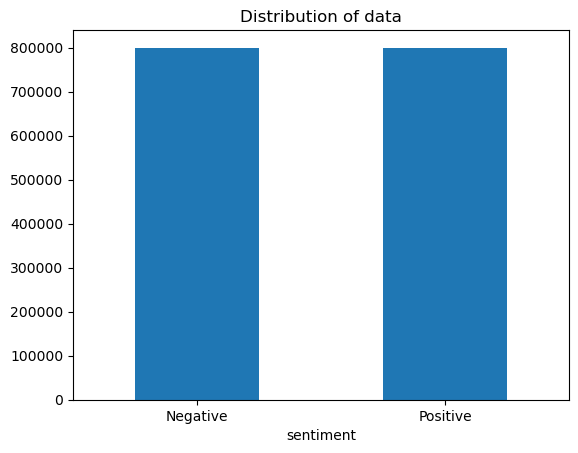

In [92]:
# Removing the unnecessary columns
dataset = dataset[["sentiment","text"]]

# Replacing the values to ease understanding
dataset["sentiment"] = dataset["sentiment"].replace(4,1)

# Plotting the distribution for dataset
ax = dataset.groupby("sentiment").count().plot(kind="bar", title="Distribution of data", legend=False)
ax.set_xticklabels(["Negative","Positive"], rotation=0)

# Storing data in lists
text, sentiment = list(dataset["text"]), list(dataset["sentiment"])

### Helper function

In [93]:
def barrier():
    print("\n <<<","-"*50,">>> \n")

## Data wrangling

In [94]:
# Defining dictionary containing all emojis with their meanings.
emojis = {":)":"smile", ":-)":"smile", ";d":"wink", ":-E":"vampire", ":(":"sad", 
          ":-(":"sad", ":-<":"sad", ":P":"raspberry", ":O":"surprised",
          ":-@":"shocked", ":@":"shocked", ":-$":"confused", ":\\":"annoyed", 
          ":#":"mute", ":X":"mute", ":^)":"smile", ":-&":"confused", "$_$":"greedy",
          "@@":"eyeroll", ":-!":"confused", ":-D":"smile", ":-0":"yell", "O.o":"confused",
          "<(-_-)>":"robot", "d[-_-]b":"dj", ":'-)":"sadsmile", ";)":"wink", 
          ";-)":"wink", "O:-)":"angel","O*-)":"angel","(:-D":"gossip", "=^.^=":"cat"}

# Stopwords
stopwords = stopwords.words("english")

In [95]:
def preprocess(text_data):
    processed_text = []
    
    # Create lemmatizer
    word_lemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    url_pattern = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
    user_pattern = r"@[^\s]+"
    alpha_pattern = r"[^a-zA-Z0-9]"
    sequence_pattern = r"(.)\1\1+"
    seqReplace_pattern = r"\1\1"
    
    ###############################################################################################
    for tweet in text_data:
        tweet = tweet.lower()
        
        ###############################################################################################
        # Replace all URls with "URL"
        tweet = re.sub(url_pattern,"URL",tweet)
        # Replace all emojis
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME with "USER"
        tweet = re.sub(user_pattern," USER", tweet)       
        # Replace all non-alphanumeric characters
        tweet = re.sub(alpha_pattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letters
        tweet = re.sub(sequence_pattern, seqReplace_pattern, tweet)
        
        ###############################################################################################
        tweet_cleaned = ""
        words = tweet.split()
        words_cleaned = []
        
        for word in words:
            if word not in stopwords:
                words_cleaned.append(word_lemm.lemmatize(word))
        
        processed_text.append(" ".join(words_cleaned))
    
    return processed_text

In [96]:
# Timing
start = time.time()
processedtext = preprocess(text)
print(f"Text Preprocessing complete.")
print(f"Time Taken: {round(time.time() - start)} seconds")

Text Preprocessing complete.
Time Taken: 129 seconds


### Explain

In [97]:
# pattern = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
# print(re.findall(pattern, "www.twitter.com"))
# print(re.findall(pattern, "www."))

In [98]:
# t = text[:2]
# print(t)
# print(preprocess(t))

# barrier()

# string = "@d_olaiya told me so #fuck_off fool www.twiiter.com food :-) game O:-) game."
# print(TweetTokenizer().tokenize(string))
# print(word_tokenize(string))
# [TweetTokenizer().tokenize(i) for i in t]

## EDA
Now we'e going to analyse the preprocessed data to get an understanding of it. We'l plot **Word Clouds** for **Positive and Negative** tweets from our dataset and see which words occur the most.

### Word-cloud for negative tweets

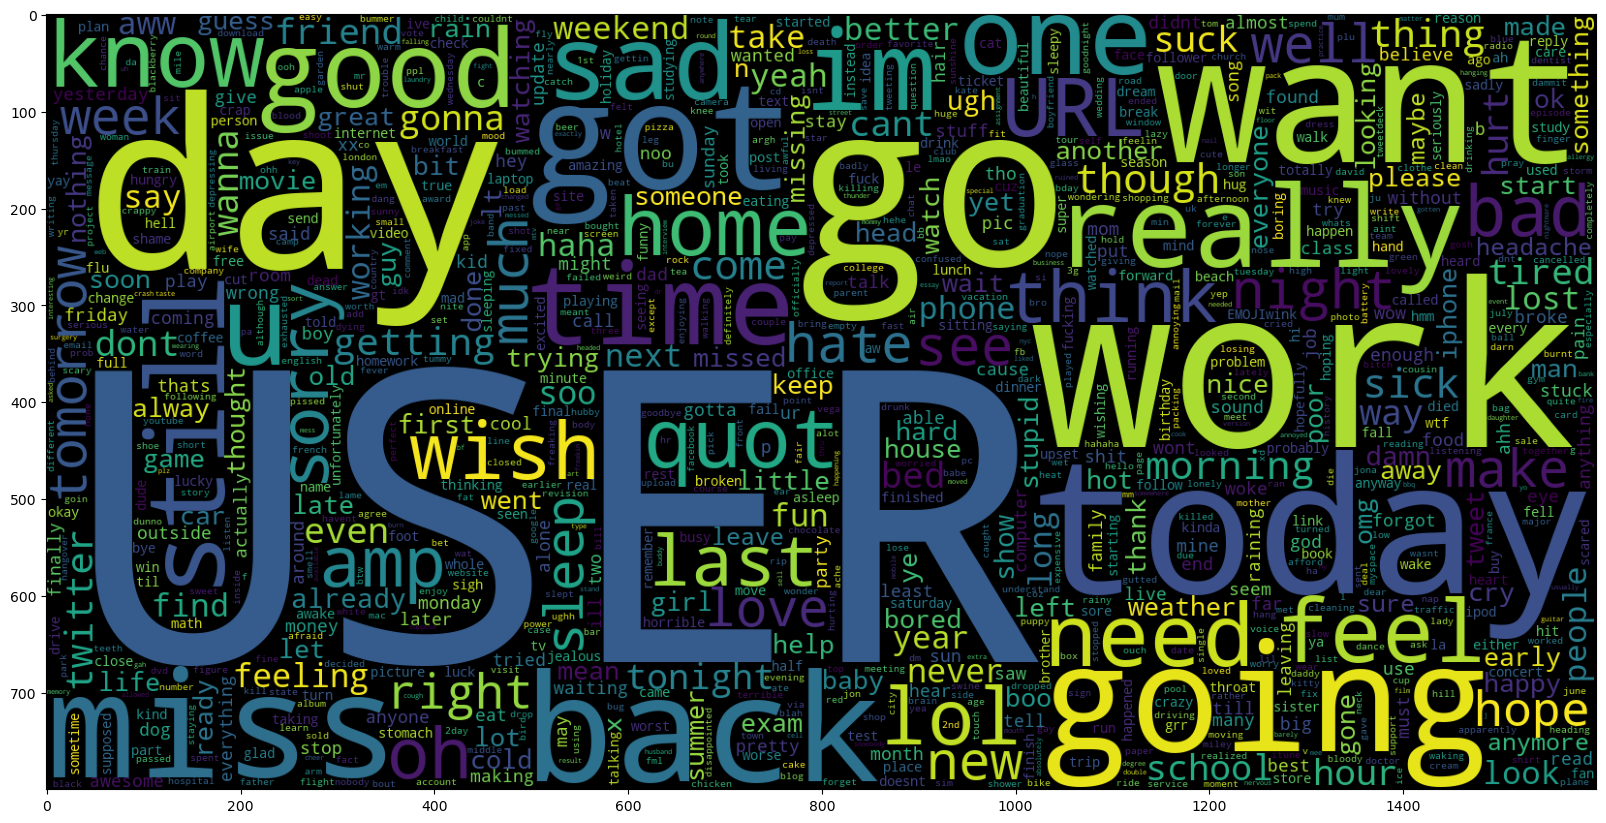

In [99]:
data_neg = processedtext[:800000]
plt.figure(figsize=(20,20))
wc = WordCloud(max_words= 1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

### Word-cloud for positive tweets

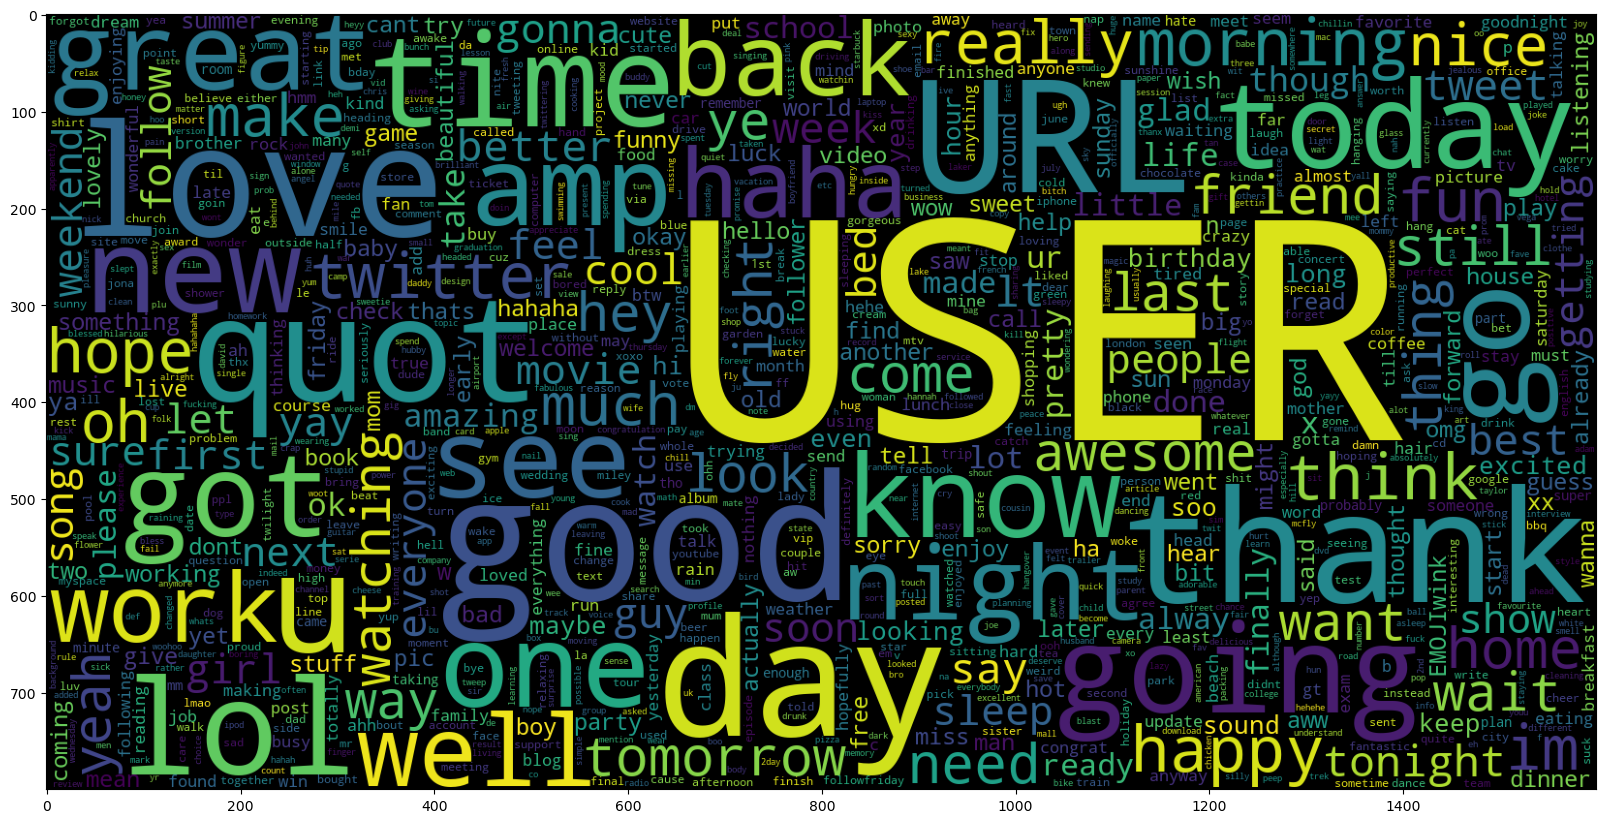

In [100]:
data_pos = processedtext[800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.show()